In [3]:
import gym
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
%matplotlib inline
env=gym.make('FrozenLake-v0')
env.render()
clear_output(wait=True)


SFFF
FHFH
FFFH
HFFG


0.29615
[[4.28932978e-02 3.09164094e-02 2.49620228e-01 5.92013373e-02]
 [1.91729909e-02 1.52946321e-02 3.70308262e-05 1.19160323e-01]
 [4.99876686e-02 7.06805449e-03 1.56541028e-02 3.43289081e-02]
 [1.47455592e-02 6.77599915e-03 9.35054955e-03 4.31801904e-02]
 [3.77002988e-01 7.39759403e-02 2.17936658e-02 3.00232318e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.18732383e-05 1.27965339e-03 4.00347093e-02 1.14985620e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.71695611e-03 9.22027750e-03 2.59966166e-02 3.70913700e-01]
 [1.79997985e-02 1.93384601e-01 1.08333610e-03 1.01605343e-02]
 [7.96283036e-01 1.93600155e-02 3.50500705e-04 4.35762160e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.90414739e-02 1.24964896e-01 6.19509562e-01 2.25530562e-01]
 [4.54343973e-01 9.91155171e-01 5.00568736e-01 2.95181193e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 

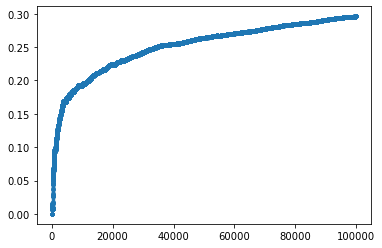

In [5]:
# https://zitaoshen.rbind.io/project/rl/1-min-of-reinforcement-learning-q-learning/

Q = np.zeros([env.observation_space.n,env.action_space.n])
alpha=0.8
gamma=0.95
number_episode=100000
beta=0.3
G=[]
##loop for each episode
for episode in range(number_episode):
    s=env.reset()
    G_episode=0
    done=False
    episode_length=0
    epsilon = (1/(1+episode))**(beta)
    while episode_length <=100:##  episode must be finished in 100 steps 
        if rnd.rand() < epsilon:## choose action epslone greedy
            a = env.action_space.sample()## pick a random action
        else:
            a = np.argmax(Q[s,:])##choose an action
        s_next,r,done,_=env.step(a)
        ## update Q
        Q[s,a]=Q[s,a]+alpha*(r+gamma*np.max(Q[s_next,:])-Q[s,a])
        G_episode+=r
        s=s_next
        episode_length+=1
        ## the current episode ends
        if done == True:
            break
    G.append(G_episode)
print (sum(G)/number_episode)
print (Q)    
plt.plot(np.cumsum(G)/np.arange(1,number_episode+1),'.') 